In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mdfeature.Langevin import LangevinDynamics
from mdfeature.potentials import shallow_well_potential, double_well_potential

In [114]:
beta=1
step_size=0.01
double_well_sampler = LangevinDynamics(x0=0.0, potential=double_well_potential, beta=beta, time_step=step_size)
shallow_well_sampler = LangevinDynamics(x0=0.0, potential=shallow_well_potential, beta=beta, time_step=step_size)

In [110]:
double_well_samples = double_well_sampler.simulate(number_of_steps=1000, burn_in=100, num_processes=1)
double_well_traj = np.concatenate(double_well_samples).ravel()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3371.30it/s]


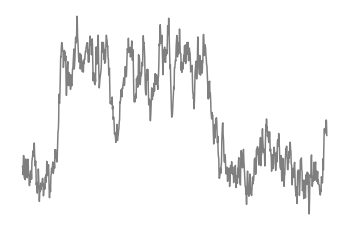

In [111]:
plt.plot(double_well_traj,c='tab:gray')
plt.axis('off')
plt.savefig('gray_traj.pdf')
plt.show()

initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

05-08-22 16:17:07 pyemma.coordinates.clustering.kmeans.KmeansClustering[42] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


/home/dominic/miniconda3/envs/diffusion/lib/python3.9/site-packages/deeptime/clustering/_kmeans.py:466: UserWarning: Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.
  warnings.warn(f"Algorithm did not reach convergence criterion"


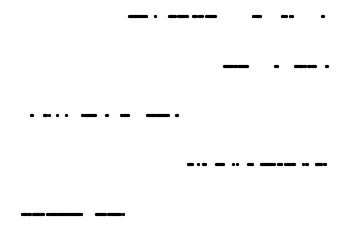

In [71]:
import pyemma as pe
clusterer = pe.coordinates.cluster_kmeans(double_well_traj, k=5)
plt.axis('off')
plt.scatter(np.arange(200,500,1), clusterer.dtrajs[0][200:500], c='k', s=5)
plt.savefig("discrete_traj.pdf")

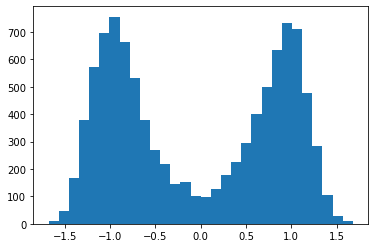

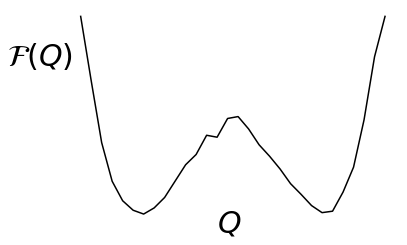

In [46]:
hist = plt.hist(double_well_traj, bins=30)
plt.show()
plt.figure()
plt.plot(-np.log(hist[0]),'k')
plt.text(-7, -3.5, r"$\mathcal{F}(Q)$", fontsize=30)
plt.text(13, -7, r"$Q$", fontsize=30)
plt.axis('off')
plt.savefig('free_energy_estimate.pdf')
plt.show()

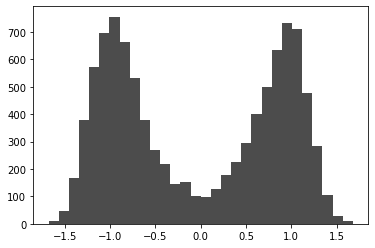

In [49]:
hist = plt.hist(double_well_traj, bins=30, color='k', alpha=0.7)

In [124]:
shallow_well_samples = shallow_well_sampler.simulate(number_of_steps=50000, burn_in=100, num_processes=1)
shallow_well_traj = np.concatenate(shallow_well_samples).ravel()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 6321.16it/s]


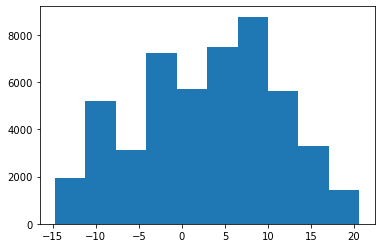

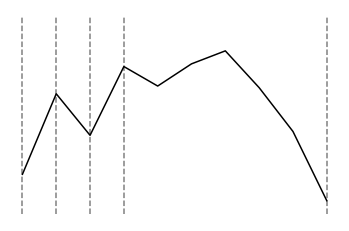

In [148]:
hist = plt.hist(shallow_well_traj, bins=10)
plt.show()
plt.figure()
plt.plot(np.log(hist[0]),'k')
#plt.text(-7, -3.5, r"$\mathcal{F}(Q)$", fontsize=30)
#plt.text(13, -7, r"$Q$", fontsize=30)
plt.axis('off')
plt.savefig('free_energy_estimate.pdf')
plt.vlines(x=0,ymin=7.1, ymax=9.5,colors='tab:gray',ls='--')
plt.vlines(x=1,ymin=7.1, ymax=9.5,colors='tab:gray',ls='--')
plt.vlines(x=2,ymin=7.1, ymax=9.5,colors='tab:gray',ls='--')
plt.vlines(x=3,ymin=7.1, ymax=9.5,colors='tab:gray',ls='--')
plt.vlines(x=9,ymin=7.1, ymax=9.5,colors='tab:gray',ls='--')
plt.savefig('diffusion2_discrete.pdf')
plt.show()

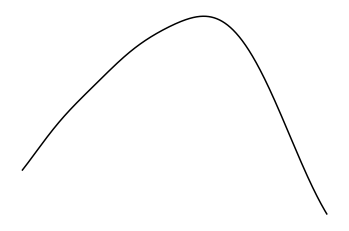

In [165]:
y = np.log(hist[0])

from scipy.signal import convolve
import scipy.interpolate as interpolate
from scipy.ndimage import gaussian_filter1d

def gaussian_smooth(x, y, dx, sigma):
    interp = interpolate.interp1d(x, y, fill_value='extrapolate')
    interpolated_x = np.arange(min(x), max(x)+dx/2, dx)
    sigma_gaussian = sigma/dx
    smoothed_y = gaussian_filter1d(interp(interpolated_x), sigma_gaussian, mode='nearest')

    return interpolated_x, smoothed_y

x_smooth, y_smooth = gaussian_smooth(np.arange(0,10,1),y,0.01,1)
plt.axis('off')
plt.plot(x_smooth, y_smooth,'k')
plt.savefig("diffusion2_smooth.pdf")